Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

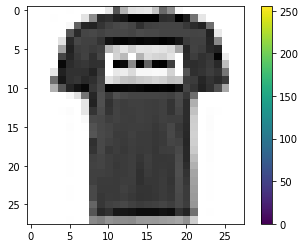

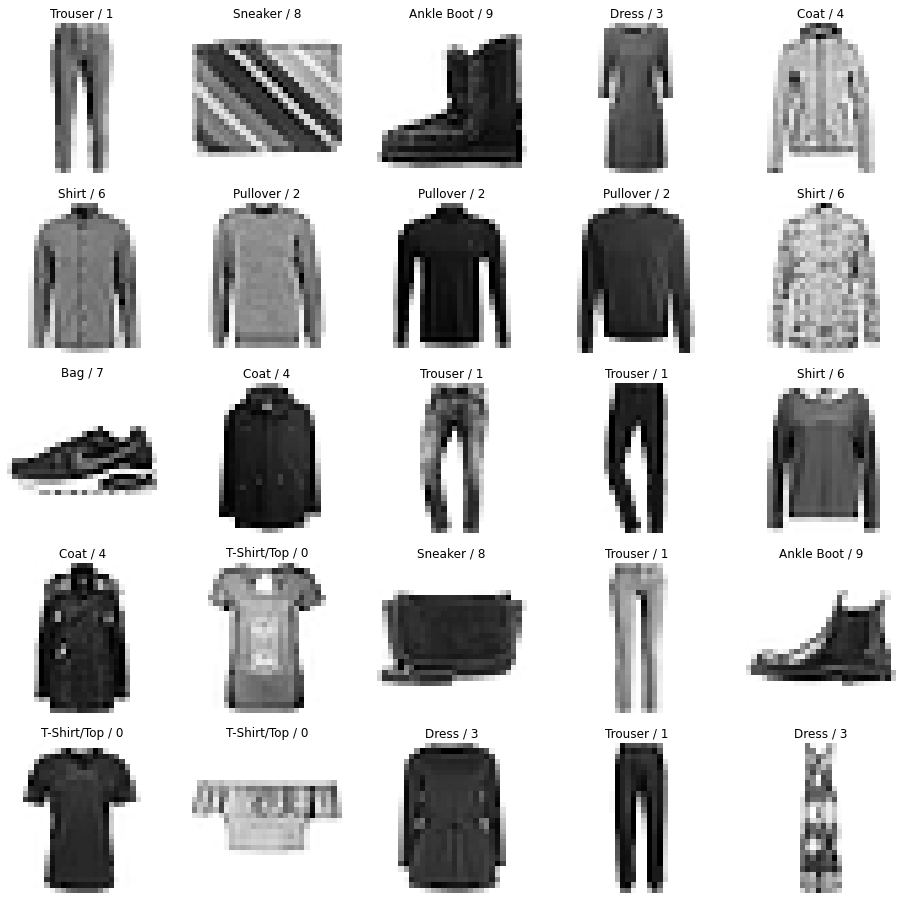

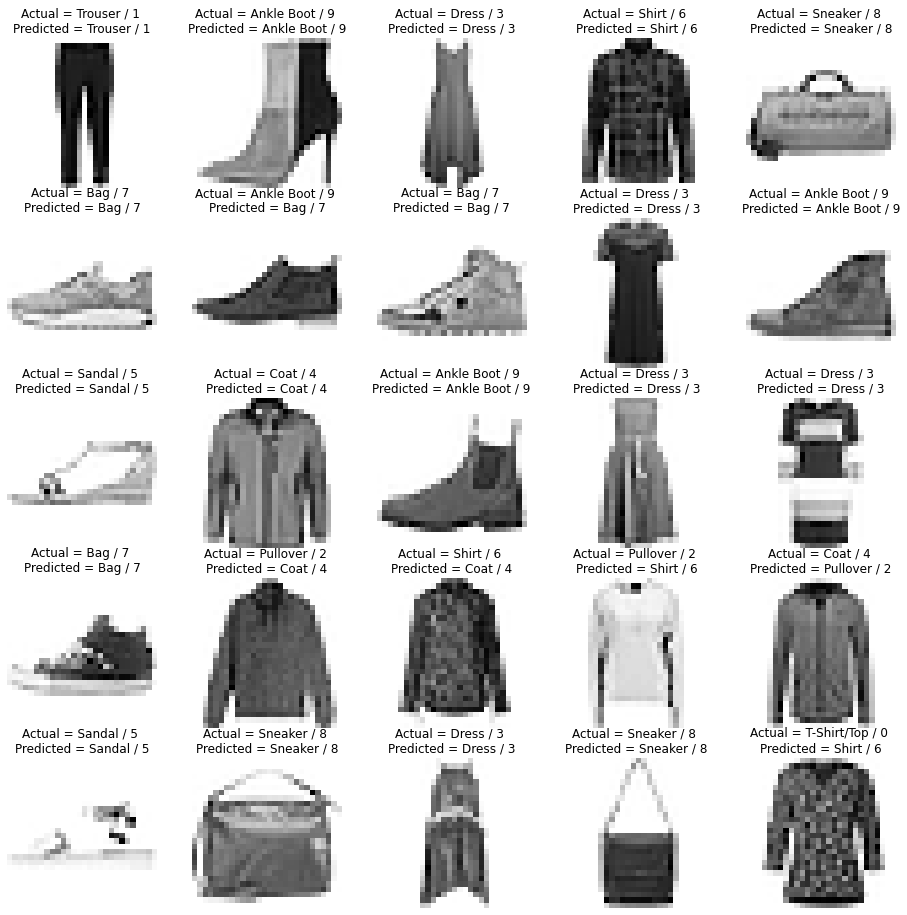

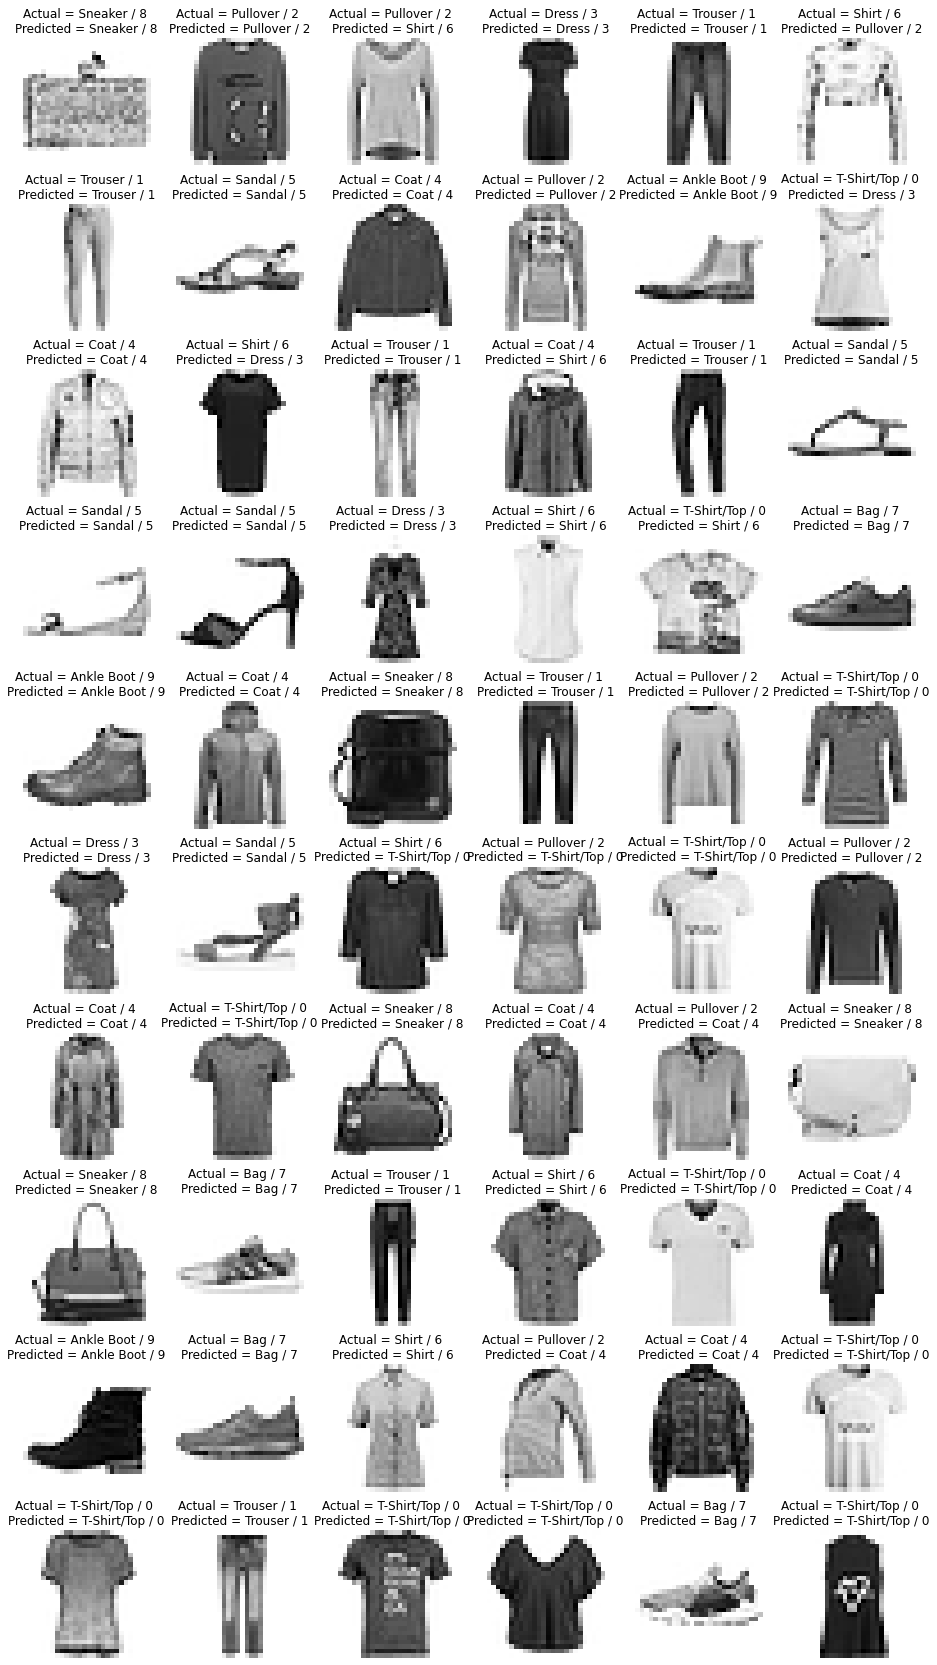

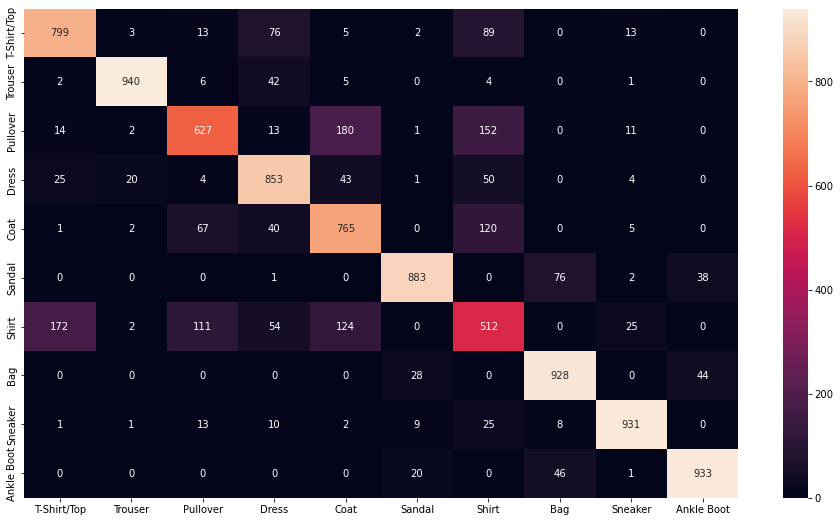

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train.shape, Y_train.shape, "**************" , X_test.shape, Y_train.shape

X_train[1]

Y_train[1]

class_labels = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Bag", "Sneaker", "Ankle Boot"]

class_labels

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

X_train[0]

X_train = X_train/255
X_test = X_test/255

X_train[0]

plt.imshow(X_train[1], cmap = "Greys")

plt.figure(figsize = (16, 16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i], cmap = "Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[Y_train[i]], Y_train[i]))

X_train.ndim

X_train = np.expand_dims(X_train, -1)

X_train.ndim

X_test = np.expand_dims(X_test, -1)

X_train = X_train/255
X_test = X_test/255

from sklearn.model_selection import train_test_split
X_train, X_Validation, y_train, y_Validation = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 2020)

X_train.shape, X_Validation.shape, y_train.shape, y_Validation.shape

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation = 'relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation = 'relu'),
    keras.layers.Dense(units=10, activation = 'softmax')
  ])

model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 512, verbose = 1, validation_data = (X_Validation, y_Validation))

y_pred = model.predict(X_test)
y_pred.round(2)

Y_test

model.evaluate(X_test, Y_test)

plt.figure(figsize = (16,16))
j=1
for i in np.random.randint(1000, 2000, 25):
  plt.subplot(5, 5, j);j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[Y_test[i]], Y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

plt.figure(figsize = (16,30))
j=1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10, 6, j);j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[Y_test[i]], Y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(Y_test, y_pred_labels)

sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)

from sklearn.metrics import classification_report
cr = classification_report(Y_test, y_pred_labels, target_names = class_labels)
print(cr)

model.save('Fasion_cnn_model.h5')

In [5]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# compile the model
cnn_model2.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 13s 125ms/step - loss: 1.9671 - accuracy: 0.2533 - val_loss: 1.1335 - val_accuracy: 0.5488
Epoch 2/20
94/94 [==============================] - 11s 120ms/step - loss: 1.0408 - accuracy: 0.5781 - val_loss: 0.9512 - val_accuracy: 0.6199
Epoch 3/20
94/94 [==============================] - 11s 122ms/step - loss: 0.9248 - accuracy: 0.6381 - val_loss: 0.8311 - val_accuracy: 0.6773
Epoch 4/20
94/94 [==============================] - 11s 118ms/step - loss: 0.8453 - accuracy: 0.6787 - val_loss: 0.7619 - val_accuracy: 0.7025
Epoch 5/20
94/94 [==============================] - 11s 122ms/step - loss: 0.7715 - accuracy: 0.7082 - val_loss: 0.6929 - val_accuracy: 0.7304
Epoch 6/20
94/94 [==============================] - 11s 117ms/step - loss: 0.7152 - accuracy: 0.7275 - val_loss: 0.6440 - val_accuracy: 0.7477
Epoch 7/20
94/94 [==============================] - 11s 115ms/step - loss: 0.6691 - accuracy: 0.7437 - val_loss: 0.6159 - val_accuracy: 0.7604